In [127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn import metrics

In [128]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


There is no missing data

In [129]:
print("There is ", dataset.isnull().sum().sum(), " missing data")
dataset.info()

There is  0  missing data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non

There is no missing data but the date feature is not numerical

In [130]:
date_list = []
for i in dataset['date'] :
  i = int(i[:6])
  date_list.append(i)

dataset['date'] = pd.Series(date_list)  
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,201410,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,201412,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,201502,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,201412,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,201502,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


All the data is now numerical

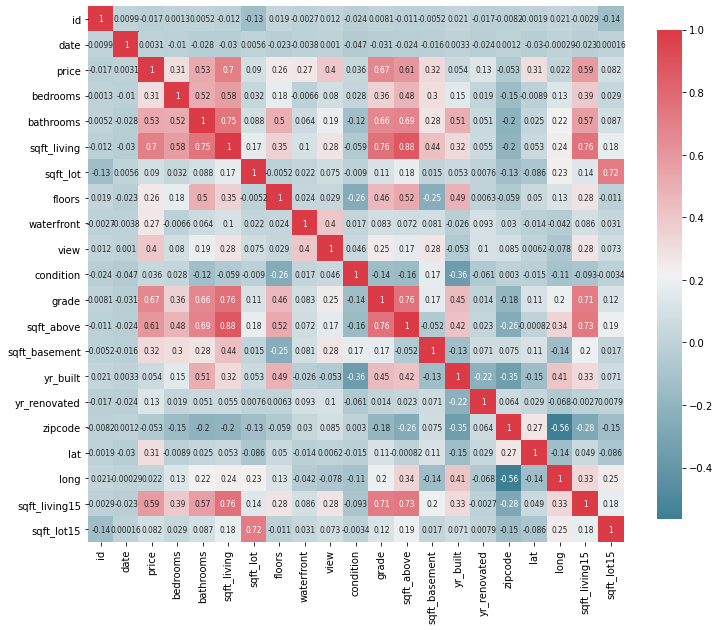

In [131]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 7.5}
        )
  
plot_correlation_map(dataset)

Only the data with 0.2 or higher correlation value with the price is important for our model. So any other feature must be dropped.

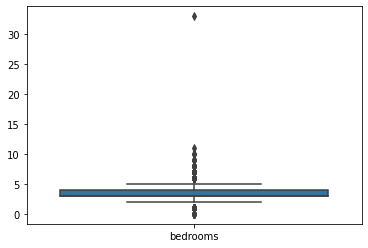

In [132]:
sns.boxplot(data=dataset[['bedrooms']])
dataset = dataset[(dataset['bedrooms'] < 9)]

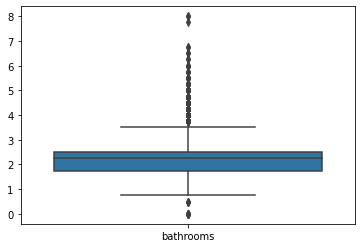

In [133]:
sns.boxplot(data=dataset[['bathrooms']])
dataset = dataset[(dataset['bedrooms'] < 7)]

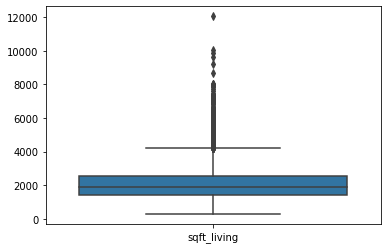

In [134]:
sns.boxplot(data=dataset[['sqft_living']])
dataset = dataset[(dataset['sqft_living'] < 11000)]

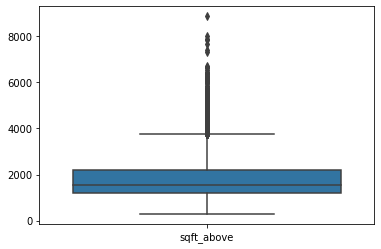

In [135]:
sns.boxplot(data=dataset[['sqft_above']])
dataset = dataset[(dataset['sqft_above'] < 8000)]

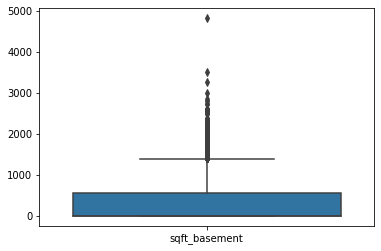

In [136]:
sns.boxplot(data=dataset[['sqft_basement']])
dataset = dataset[(dataset['sqft_basement'] < 4000)]

The outliers are detected using boxplots then they got removed.

In [137]:
dataset.drop(['id', 'date', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15'], axis=1, inplace=True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


Feature selection

In [138]:
x = dataset['sqft_living'].values[:,np.newaxis]
y = dataset['price'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [139]:
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

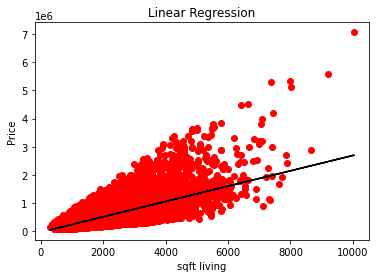

In [140]:
plt.scatter(x, y, color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft living")
plt.plot(x, model.predict(x), color="k")
plt.show()

The data points distribution shows that the linear regression isn't a good model for this dataset.

In [141]:
mse = metrics.mean_squared_error(y_test,predicted)
r_squared = metrics.r2_score(y_test,predicted)
print("MSE: ", mse, '\n', 'R2: ', r_squared)

MSE:  71176535444.3886 
 R2:  0.4881249197177725


The R squared is 0.48 (low) and the MSE is high so the linear regression isn't a good model for predicting.

In [142]:
x_ = dataset.iloc[:,1:].values
y_ = dataset['price'].values

x_train_,x_test_,y_train_,y_test_=train_test_split(x_, y_, test_size=0.25, random_state=30)

In [143]:
mllinear = LinearRegression()
mllinear.fit(x_train_, y_train_)
predicted_ = mllinear.predict(x_test_)

mse_ = metrics.mean_squared_error(y_test_,predicted_)
r_squared_ = metrics.r2_score(y_test_,predicted_)
print("MSE: ", mse_, '\n', 'R2: ', r_squared_)

MSE:  48082746287.059845 
 R2:  0.654206832880918


The R squared of the multi-linear regression model is bigger than the R squared of the linear regression model. So a multi-linear model is better for this dataset, yet, it is not ideal.

In [144]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train_)
lg.fit(x_train_fit, y_train_)
x_test_ = poly.fit_transform(x_test_)
predicted_poly = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test_, predicted_poly))
print("R squared: ", metrics.r2_score(y_test_,predicted_poly))

MSE:  33690441531.464417
R squared:  0.7577109175658588


The polynomial regression model has the biggest R squared value and the least MSE. So a polynomial model with 3 degrees is the best choice to predicting a house's price.